# PARTE 1

## PARTE 1 - LIMPEZA E TRATAMENTO DE DADOS:

### - Utilizando suas habilidades ninja em Python e bibliotecas como Pandas, Numpy, Seaborn e outras, você deve:

In [52]:
# Importando as bibliotecas necessárias
import pandas as pd

# Lendo o arquivo XLSX
dados = pd.read_excel('Trilhas2B-Desafio 4 .xlsx')

# Exibindo as primeiras linhas do DataFrame
print("\nPrimeiras 5 linhas do DataFrame:")
print(dados.head())

# Exibindo informações sobre o DataFrame
print("\nInformações sobre o DataFrame:")
print(dados.info())



Primeiras 5 linhas do DataFrame:
   ID  PONTOS ESTADO    GENERO  IDADE  BENS  SALDO NA CONTA  PRODUTOS  \
0   1     619     PI  Feminino     42     2               0         1   
1   2     608     CE  Feminino     41     1         8380786         1   
2   3     502     PI  Feminino     42     8         1596608         3   
3   4     699     PI  Feminino     39     1               0         2   
4   5     850     CE  Feminino     43     2        12551082         1   

   POSSUI CARTAO  ATIVO  SALARIO ANUAL  SAIU  
0              1      1     10134888.0     1  
1              0      1     11254258.0     0  
2              1      0     11393157.0     1  
3              0      0      9382663.0     0  
4              1      1       790841.0     0  

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID           

### 01)  Altere os nomes das colunas para letras minúsculas, utilizando a biblioteca pandas

In [53]:
# Convertendo os nomes das colunas para minúsculas
dados.columns = dados.columns.str.lower()

# Exibindo o resultado
print("\nNomes das colunas após conversão para minúsculas:")
print(dados.columns)



Nomes das colunas após conversão para minúsculas:
Index(['id', 'pontos', 'estado', 'genero', 'idade', 'bens', 'saldo na conta',
       'produtos', 'possui cartao', 'ativo', 'salario anual', 'saiu'],
      dtype='object')


###  02) Explore colunas categóricas, utilizando função groupby() e outras, visando aplicar os gráficos para visualizações e a compreensão desses dados.


Distribuição por Gênero:
genero
Feminino     463
Masculino    535
dtype: int64


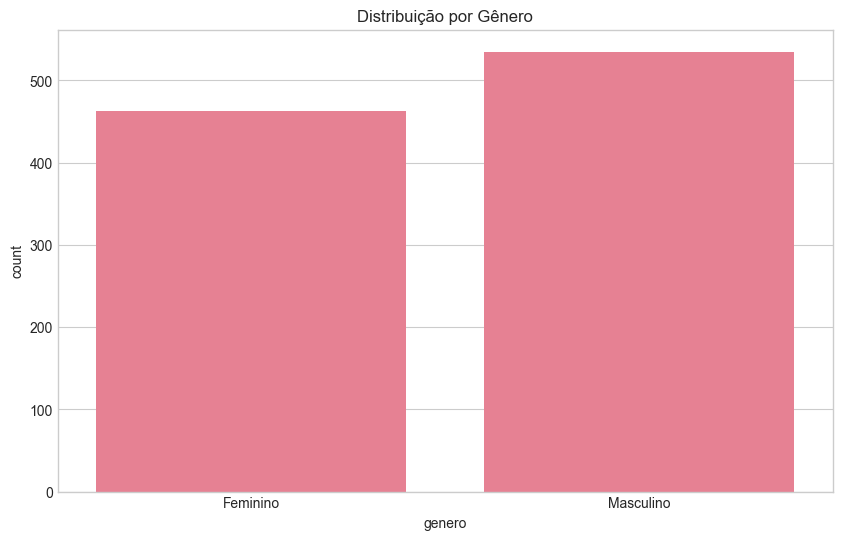


Distribuição por Estado:


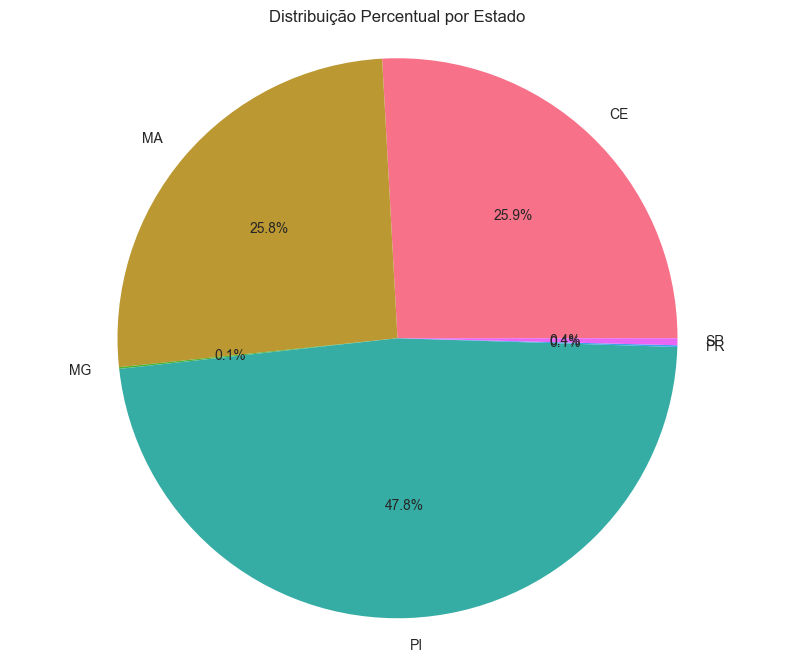

<Figure size 1500x800 with 0 Axes>

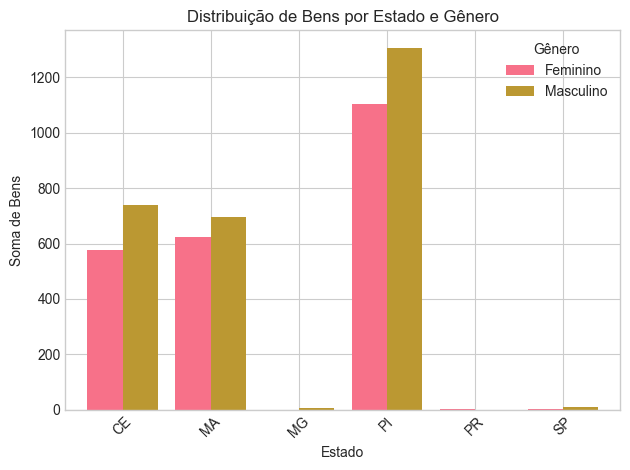

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("\nDistribuição por Gênero:")
dist_sexo = dados.groupby('genero').size()
print(dist_sexo)

plt.figure(figsize=(10,6))
sns.countplot(data=dados, x='genero')
plt.title('Distribuição por Gênero')
plt.show()

print("\nDistribuição por Estado:")
dist_estado = dados.groupby('estado').size()

porcentagens = (dist_estado / len(dados) * 100).round(1)

plt.figure(figsize=(10,8))
plt.pie(porcentagens, labels=porcentagens.index, autopct='%1.1f%%')
plt.title('Distribuição Percentual por Estado')
plt.axis('equal')
plt.show()

# Criando um DataFrame com a soma de bens por estado e gênero
bens_estado_genero = dados.groupby(['estado', 'genero'])['bens'].sum().unstack()

plt.figure(figsize=(15, 8))
bens_estado_genero.plot(kind='bar', width=0.8)
plt.title('Distribuição de Bens por Estado e Gênero')
plt.xlabel('Estado')
plt.ylabel('Soma de Bens')
plt.legend(title='Gênero')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()



### 03) Explore colunas numéricas, utilizando a função describe(), faça um boxplot ou outro gráfico que achar necessário, utilizando as bibliotecas pandas e  seaborn;

Análise descritiva das variáveis numéricas:
                id      pontos       idade        bens  saldo na conta  \
count   998.000000  998.000000  998.000000  998.000000    9.980000e+02   
mean    501.337675  648.605210   38.012024    5.073146    7.162423e+06   
std     288.500953   98.312117    8.631882    2.926320    6.314508e+06   
min       1.000000  376.000000   18.000000    0.000000    0.000000e+00   
25%     252.250000  580.000000   32.000000    2.000000    0.000000e+00   
50%     501.500000  653.000000   37.000000    5.000000    8.926348e+06   
75%     750.750000  721.000000   43.000000    8.000000    1.258767e+07   
max    1000.000000  850.000000   62.000000   10.000000    2.117743e+07   

         produtos  possui cartao      ativo  salario anual        saiu  
count  998.000000     998.000000  998.00000   9.980000e+02  998.000000  
mean     1.526052       0.703407    0.51002   3.509896e+07    0.203407  
std      0.574293       0.456985    0.50015   5.289866e+08    0.402734

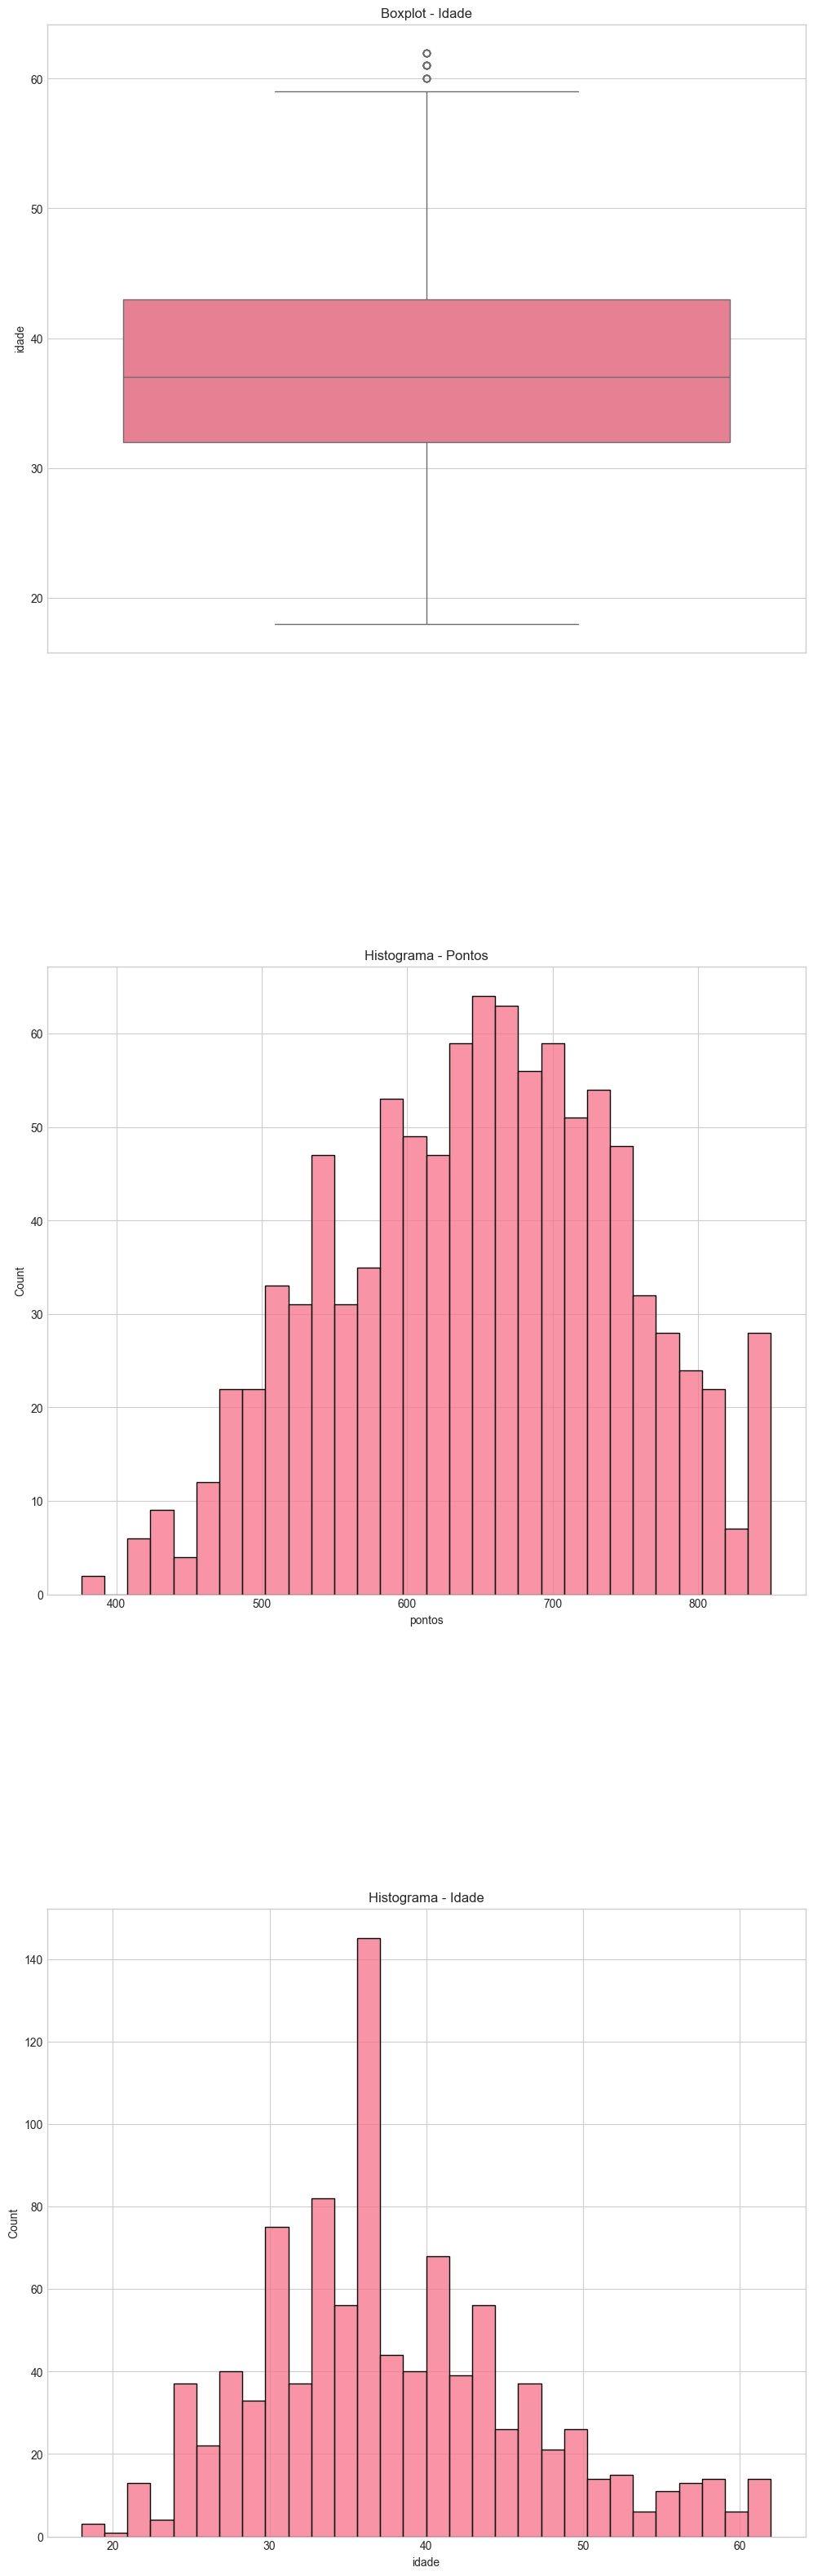

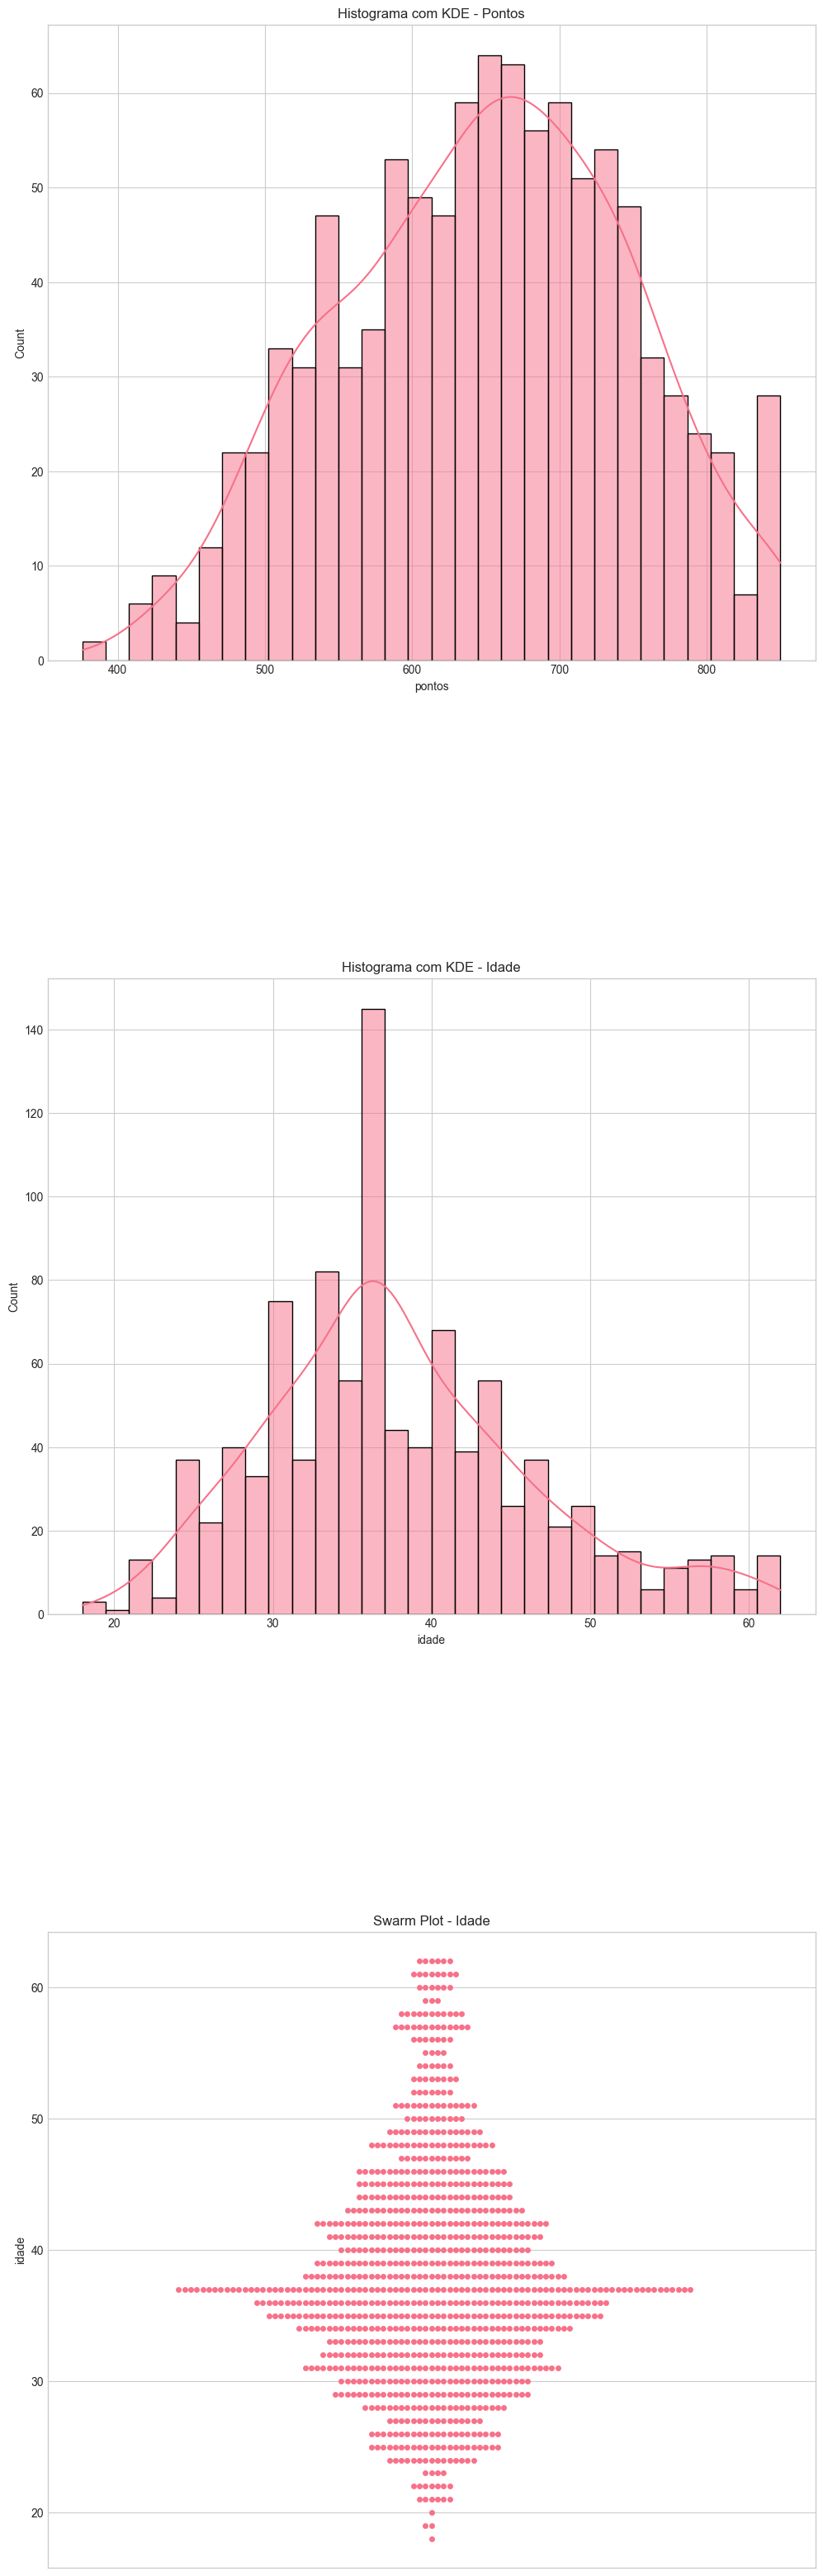

C:\Users\paulo\AppData\Local\Temp\ipykernel_16304\4039580335.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_bens_idade = dados.groupby('faixa_etaria')['bens'].mean().reset_index()


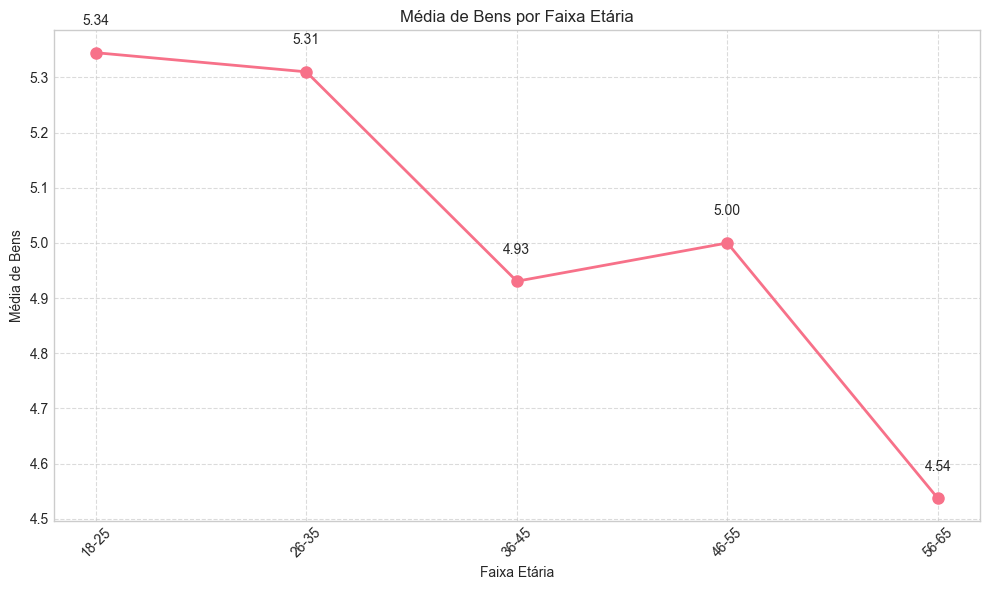

In [105]:
print("Análise descritiva das variáveis numéricas:")
print(dados.describe())

fig, axes = plt.subplots(3, 1, figsize=(12, 40))
plt.subplots_adjust(hspace=0.5)

sns.boxplot(data=dados, y='idade', ax=axes[0])
axes[0].set_title('Boxplot - Idade')

sns.histplot(data=dados, x='pontos', bins=30, ax=axes[1])
axes[1].set_title('Histograma - Pontos')

sns.histplot(data=dados, x='idade', bins=30, ax=axes[2])
axes[2].set_title('Histograma - Idade')

plt.show()

# Criando visualizações adicionais com mais detalhes

fig, axes = plt.subplots(3, 1, figsize=(12, 40))
plt.subplots_adjust(hspace=0.5)

sns.histplot(data=dados, x='pontos', kde=True, bins=30, ax=axes[0])
axes[0].set_title('Histograma com KDE - Pontos')

sns.histplot(data=dados, x='idade', kde=True, bins=30, ax=axes[1])
axes[1].set_title('Histograma com KDE - Idade')

sns.swarmplot(data=dados, y='idade', ax=axes[2])
axes[2].set_title('Swarm Plot - Idade')

plt.show()

# Criação de Gráfico que mostra a média de bens por faixa etária
dados['faixa_etaria'] = pd.cut(dados['idade'], 
                              bins=[0, 25, 35, 45, 55, 65, 100],
                              labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

media_bens_idade = dados.groupby('faixa_etaria')['bens'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(media_bens_idade['faixa_etaria'], 
         media_bens_idade['bens'], 
         marker='o', 
         linewidth=2, 
         markersize=8)

plt.title('Média de Bens por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Bens')
plt.grid(True, linestyle='--', alpha=0.7)

for x, y in zip(media_bens_idade['faixa_etaria'], media_bens_idade['bens']):
    plt.text(x, y + 0.05, f'{y:.2f}', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 04) Corrigir os dados faltantes  (NANs) e preencher as lacunas com valores adequados. 


In [89]:
print(dados.isna().sum())


# Preenchendo NaN em Genero com 'Masculino', escollha própria baseado no contexto do problema
dados['genero'] = dados['genero'].fillna('Masculino')

dados['salario anual'] = dados['salario anual'].fillna(dados['salario anual'].interpolate())

print(dados.isna().sum())



id                0
pontos            0
estado            0
genero            0
idade             0
bens              0
saldo na conta    0
produtos          0
possui cartao     0
ativo             0
salario anual     0
saiu              0
dtype: int64

Distribuição por Gênero:
genero
Masculino    535
Feminino     463
Name: count, dtype: int64
id                0
pontos            0
estado            0
genero            0
idade             0
bens              0
saldo na conta    0
produtos          0
possui cartao     0
ativo             0
salario anual     0
saiu              0
dtype: int64


### 5) Tratar os outliers, substituindo-os pelos valores adequados.



Limites para outliers na idade:
Limite inferior: 14.00
Limite superior: 62.00

Número de outliers na idade: 42

Após tratamento dos outliers:
count    999.000000
mean      38.008008
std        8.628490
min       18.000000
25%       32.000000
50%       37.000000
75%       43.000000
max       62.000000
Name: idade, dtype: float64


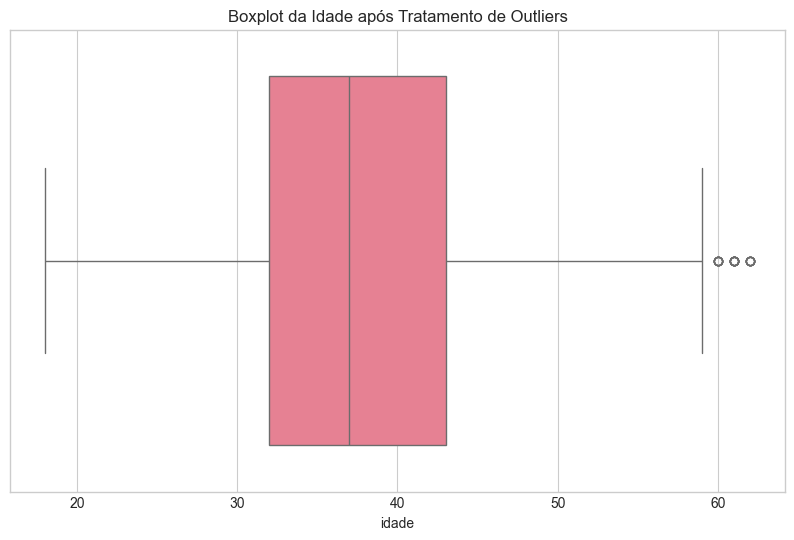

In [57]:
# Calculando os limites para outliers da idade usando o método IQR
Q1_idade = dados['idade'].quantile(0.25)
Q3_idade = dados['idade'].quantile(0.75)
IQR_idade = Q3_idade - Q1_idade
limite_inferior = Q1_idade - 1.5 * IQR_idade
limite_superior = Q3_idade + 1.5 * IQR_idade

print(f"\nLimites para outliers na idade:")
print(f"Limite inferior: {limite_inferior:.2f}")
print(f"Limite superior: {limite_superior:.2f}")

outliers_idade = dados[(dados['idade'] < limite_inferior) | (dados['idade'] > limite_superior)].index
print(f"\nNúmero de outliers na idade: {len(outliers_idade)}")

mediana_idade = dados['idade'].median()
dados.loc[outliers_idade, 'idade'] = mediana_idade

print("\nApós tratamento dos outliers:")
print(dados['idade'].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['idade'])
plt.title('Boxplot da Idade após Tratamento de Outliers')
plt.show()


### 06) Eliminar os duplicados, para garantir a unicidade.

In [61]:
print("Número total de linhas duplicadas:", dados.duplicated().sum())

if dados.duplicated().sum() > 0:
    print("\nLinhas duplicadas:")
    print(dados[dados.duplicated()])

dados = dados.drop_duplicates()

print("\nNúmero de linhas duplicadas após remoção:", dados.duplicated().sum())




Número total de linhas duplicadas: 0

Número de linhas duplicadas após remoção: 0


### 07) corrigir os dados categóricos, por exemplo, "Mas" para "Masculino", "Fem" para "Feminino" e outras inconsistências se houver, para adequá-los ao padrão.

In [75]:
# Corrigindo valores na coluna Genero
dados['genero'] = dados['genero'].replace({'M': 'Masculino', 'Mas': 'Masculino', 
                                         'F': 'Feminino', 'Fem': 'Feminino'})


# Corrigindo valores na coluna estado (Há uma inconsistência na coluna estado onde o valor RP está sendo \
# considerado como PR)
dados['estado'] = dados['estado'].replace({'RP': 'PR'})
print(dados['estado'].unique())



['PI' 'CE' 'MA' 'PR' 'SP' 'MG']


### 08) Mostre o tamanho dos dados importados, utilizando o shape.

In [76]:
dados.shape


(998, 12)

# PARTE 2

## PARTE 2 - ESTATISTICA

### 01- Apresente a média e a mediana do saldo na conta dos clientes abaixo de 40 anos;

In [77]:
clientes_abaixo_40 = dados[dados['idade'] < 40]

print("Estatísticas de saldo para clientes abaixo de 40 anos:")
print("\nMédia do saldo: R$ {:.2f}".format(clientes_abaixo_40['saldo na conta'].mean()))
print("Mediana do saldo: R$ {:.2f}".format(clientes_abaixo_40['saldo na conta'].median()))


Estatísticas de saldo para clientes abaixo de 40 anos:

Média do saldo: R$ 6914457.68
Mediana do saldo: R$ 8194148.00


#### 02- Apresente a média e a mediana do saldo na conta dos clientes acima de 40 anos;

In [78]:
clientes_acima_40 = dados[dados['idade'] > 40]

print("Estatísticas de saldo para clientes acima de 40 anos:")
print("\nMédia do saldo: R$ {:.2f}".format(clientes_acima_40['saldo na conta'].mean()))
print("Mediana do saldo: R$ {:.2f}".format(clientes_acima_40['saldo na conta'].median()))


Estatísticas de saldo para clientes acima de 40 anos:

Média do saldo: R$ 7665165.65
Mediana do saldo: R$ 10003347.00


### 03- Apresente a média e a mediana do saldo na conta dos clientes que saíram e dos que permaneceram;

In [79]:
clientes_que_sairam = dados[dados['saiu'] == 1]

clientes_que_permaneceram = dados[dados['saiu'] == 0]

print("Estatísticas de saldo para clientes que saíram:")
print("\nMédia do saldo: R$ {:.2f}".format(clientes_que_sairam['saldo na conta'].mean()))
print("Mediana do saldo: R$ {:.2f}".format(clientes_que_sairam['saldo na conta'].median()))

print("\nEstatísticas de saldo para clientes que permaneceram:")
print("\nMédia do saldo: R$ {:.2f}".format(clientes_que_permaneceram['saldo na conta'].mean()))
print("Mediana do saldo: R$ {:.2f}".format(clientes_que_permaneceram['saldo na conta'].median()))


Estatísticas de saldo para clientes que saíram:

Média do saldo: R$ 8523988.16
Mediana do saldo: R$ 10843187.00

Estatísticas de saldo para clientes que permaneceram:

Média do saldo: R$ 6814752.81
Mediana do saldo: R$ 8061393.00


### 04- Dos que saíram, mostre qual é o público predominante (Masculino ou Feminino), a idade, o saldo na conta, patrimônio e os seus respectivos estados;

In [107]:
print("Análise dos clientes que saíram do banco:\n")

print("Distribuição por gênero:")
genero_saiu = clientes_que_sairam['genero'].value_counts()
print(genero_saiu)
print(f"\nPúblico predominante: {genero_saiu.index[0]}")

print("\nEstatísticas de idade:")
print("Média: {:.1f} anos".format(clientes_que_sairam['idade'].mean()))
print("Mediana: {:.1f} anos".format(clientes_que_sairam['idade'].median()))

print("\nEstatísticas de saldo na conta:")
print("Média: R$ {:.2f}".format(clientes_que_sairam['saldo na conta'].mean()))
print("Mediana: R$ {:.2f}".format(clientes_que_sairam['saldo na conta'].median()))

print("\nEstatísticas de Bens:")
print("Média: {:.2f}".format(clientes_que_sairam['bens'].mean()))
print("Mediana: {:.2f}".format(clientes_que_sairam['bens'].median()))

print("\nDistribuição por estado:")
estado_saiu = clientes_que_sairam['estado'].value_counts()
print(estado_saiu)


Análise dos clientes que saíram do banco:

Distribuição por gênero:
genero
Feminino     120
Masculino     83
Name: count, dtype: int64

Público predominante: Feminino

Estatísticas de idade:
Média: 44.0 anos
Mediana: 43.0 anos

Estatísticas de saldo na conta:
Média: R$ 8523988.16
Mediana: R$ 10843187.00

Estatísticas de Bens:
Média: 4.73
Mediana: 5.00

Distribuição por estado:
estado
PI    76
MA    75
CE    51
PR     1
Name: count, dtype: int64


### 04- Dos que saíram, mostre qual é o público predominante (Masculino ou Feminino), a idade, o saldo na conta, patrimônio e os seus respectivos estados; (Segunda resposta, fiquei na dúvida se queria para selecionar os campos, ou mostrar as estatistícas do segundo dataframe - "clientes que saíram")

In [86]:
clientes_que_sairam = clientes_que_sairam[['genero', 'idade', 'saldo na conta', 'bens', 'estado']]
print(clientes_que_sairam)

genero_saiu = clientes_que_sairam['genero'].value_counts()
print(genero_saiu)
print(f"\nPúblico predominante dos que saíram: {genero_saiu.index[0]}")


        genero  idade  saldo na conta  bens estado
0     Feminino     42               0     2     PI
2     Feminino     42         1596608     8     PI
5    Masculino     44        11375578     8     CE
7     Feminino     29        11504674     4     MA
16   Masculino     58        13260288     1     MA
..         ...    ...             ...   ...    ...
964   Feminino     43        11588804     4     MA
976   Feminino     43        13255826     8     PI
983   Feminino     35        12810028     6     MA
987  Masculino     34        15183926     0     CE
989   Feminino     49        16819766     3     PI

[203 rows x 5 columns]
genero
Feminino     120
Masculino     83
Name: count, dtype: int64

Público predominante dos que saíram: Feminino
